<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [ ]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [ ]:
product_df=pd.read_csv("/content/drive/MyDrive/NLP/product_data.csv")
review_df=pd.read_csv("/content/drive/MyDrive/NLP/reviews.csv")

In [ ]:
product_df.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0000000,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.9500000,0.0000000
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7000000,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.9900000,0.0000000
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3000000,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0000000,0.0000000
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1000000,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.9900000,0.0000000


In [ ]:
review_df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000


In [ ]:
product_df.shape,review_df.shape

((720, 10), (67986, 8))

## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [ ]:
product_df[product_df["originalPrice"]==0]["asin"].count()
# of 720 records 600 records are zero so it is of no use , we can drop

600

In [ ]:
product_df[product_df["price"]==0]["asin"].count()

124

In [ ]:
#Check if zero in price we can drop those records from product file 
product_df.drop(product_df[product_df['price']==0].index, inplace = True)

In [ ]:

product_df[product_df["price"]==0]["asin"].count()

0

In [ ]:
product_df[product_df["price"]==0]["asin"].count()

0

In [ ]:
product_dff=product_df.drop(["url","image","reviewUrl","originalPrice"],axis=1)

In [ ]:
#Check if zero in price we can drop those records from product file 
product_dff[product_df["price"]==0]["asin"].count()

0

In [ ]:
product_dff.shape

(596, 6)

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [ ]:
product_dff.describe()

,rating,totalReviews,price
count,596.0000000,596.0000000,596.0000000
mean,3.7605705,107.1157718,283.8309228
std,0.7221157,168.6654738,185.5873795
min,1.0000000,1.0000000,1.0000000
25%,3.5000000,7.0000000,148.9750000
50%,3.9000000,33.0000000,231.8500000
75%,4.2000000,122.5000000,389.4450000
max,5.0000000,929.0000000,999.9900000


In [ ]:
product_dff.describe(include="O")

,asin,brand,title
count,596,593,596
unique,596,10,595
top,B07HKQ61NV,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ..."
freq,1,269,2


In [ ]:
review_df.describe()

,rating,helpfulVotes
count,67986.0000000,27215.0000000
mean,3.8079163,8.2296895
std,1.5829058,31.9548772
min,1.0000000,1.0000000
25%,3.0000000,1.0000000
50%,5.0000000,2.0000000
75%,5.0000000,5.0000000
max,5.0000000,990.0000000


In [ ]:
review_df.describe(include="O")

,asin,name,date,title,body
count,67986,67984,67986,67972,67965
unique,720,47323,2983,41489,59811
top,B00F2SKPIM,Amazon Customer,"December 11, 2019",Five Stars,Good
freq,981,6507,234,6043,303


In [ ]:
review_df[review_df["helpfulVotes"]==990]

,asin,name,rating,date,verified,title,body,helpfulVotes
24467,B01GXAT0CE,Jake,1,"May 1, 2017",True,It seems like it has been stolen,"The product came in a beaten up box, came lock...",990.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

In [ ]:
#We have details of 596 items/products. The top brand is Samsung.
#There are no duplicate asin id
#Rating ranges from 1 to 5. Mean rating is 3.8
#Price ranges from 1 to 999.99 with 283 as mean price value


### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

In [ ]:
# Understand relationship between brand and price 
# Brand and ratings

### 4.5 Display average rating per brand

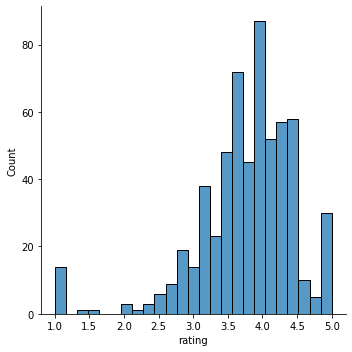

In [ ]:
sns.displot(data= product_dff,x='rating')


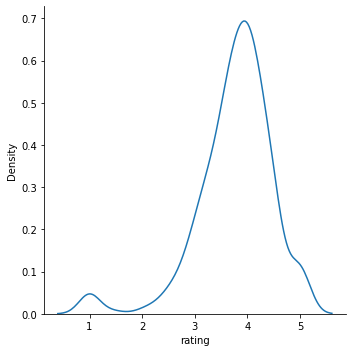

In [ ]:
sns.displot(data= product_dff,x='rating',kind="kde")

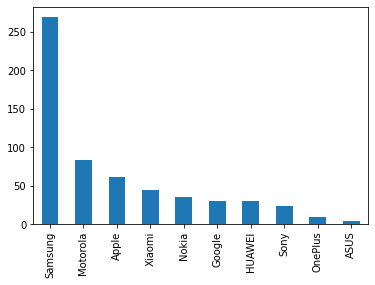

In [ ]:
product_dff["brand"].value_counts().plot(kind="bar")

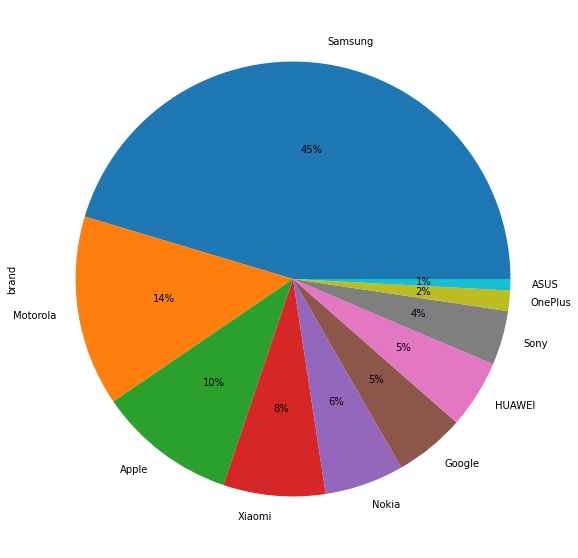

In [ ]:
product_dff["brand"].value_counts().plot(kind="pie",autopct='%1.0f%%',figsize=(12,10))


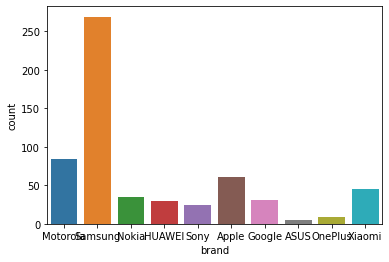

In [ ]:
sns.countplot(product_dff.brand)

### 4.6 Display average price per brand

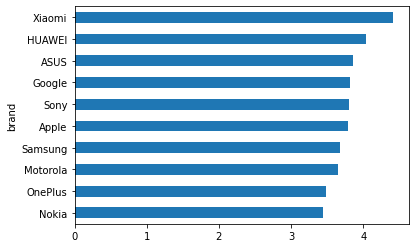

In [ ]:
product_dff.groupby(by="brand")["rating"].mean().sort_values().plot(kind="barh")

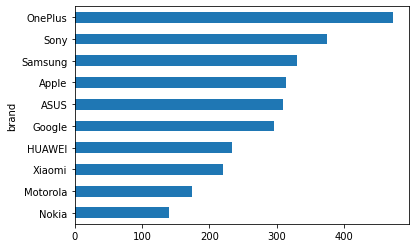

In [ ]:
product_dff.groupby(by="brand")["price"].mean().sort_values().plot(kind="barh")

### 4.7 Display average 'totalReviews' per brand

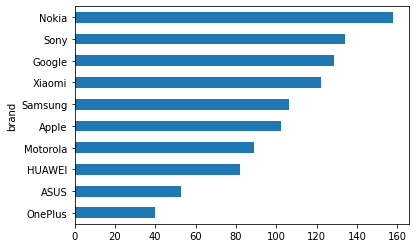

In [ ]:
product_dff.groupby(by="brand")["totalReviews"].mean().sort_values().plot(kind="barh")

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [ ]:
df=pd.merge(review_df,product_dff, how="left",on='asin')


In [ ]:
df.shape

(67986, 13)

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [ ]:
df.rename(columns={"rating_x": "user_rating", "title_x": "review_title","title_y": "item_title","rating_y":"overall_rating"},inplace=True)
df.head(2)

,asin,name,user_rating,date,verified,review_title,body,helpfulVotes,brand,item_title,overall_rating,totalReviews,price
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,NaN,nan,nan,nan
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,NaN,nan,nan,nan


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [ ]:
df["verified"].value_counts()
#more verified revies 

True     61225
False     6761
Name: verified, dtype: int64

In [ ]:
dff=df[df.verified==True]
dff.shape

(61225, 13)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

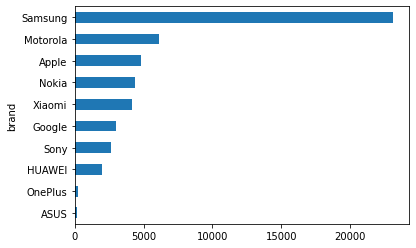

In [ ]:
dff.groupby(by='brand')['totalReviews'].count().sort_values().plot(kind='barh')
#Samsung has maximum total reviews more than 20k


### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [ ]:
df_final = dff[['brand','body','price','user_rating','review_title']]
df_final.head(2)


,brand,body,price,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

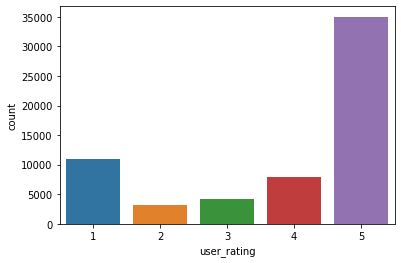

In [ ]:
sns.countplot(df_final['user_rating'])

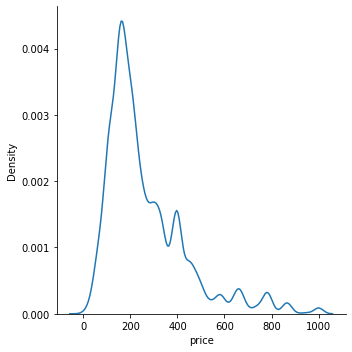

In [ ]:
sns.displot(data= df_final,x='price',kind="kde")

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (negative) if the user_Rating <= 3

In [ ]:
df_final["sentiment"]=df_final["user_rating"].apply(lambda x:1 if x>3 else 0)

In [ ]:
df_final["user_rating"].value_counts()

5    35001
1    10910
4     7938
3     4128
2     3248
Name: user_rating, dtype: int64

### 4.15 Check frequency distribution of the 'sentiment'

In [ ]:
count=df_final["sentiment"].value_counts()
print(count)

1    42939
0    18286
Name: sentiment, dtype: int64


### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

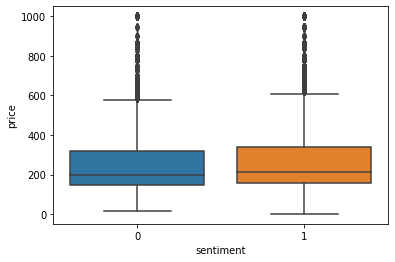

In [ ]:
sns.boxplot(data=df_final,x="sentiment",y="price")
# mo major correlation between price and sentiment as mean is same 

In [ ]:
pd.crosstab(df_final.sentiment, [df_final.brand], rownames=['sentiment'], colnames=['brand']).apply(lambda x:x/x.sum(),axis=1)
# Some correlation between established brands and positive sentiment can be seen
# if we see sentiment category 1 across brands ---- Samsung shows more positive 50% positive next being motorola 

brand,ASUS,Apple,Google,HUAWEI,Motorola,Nokia,OnePlus,Samsung,Sony,Xiaomi
sentiment,,,,,,,,,,
0,0.0046068,0.1066230,0.0637602,0.0236347,0.1119642,0.1184404,0.0027373,0.4691548,0.0578181,0.0412605
1,0.0038364,0.0901123,0.0566212,0.0460642,0.1241634,0.0740108,0.0063846,0.4506175,0.0492005,0.0989891


In [ ]:
df_final[df_final["brand"]=="Samsung"]["user_rating"].value_counts()

5    13339
1     4364
4     2753
3     1494
2     1169
Name: user_rating, dtype: int64

In [ ]:
pd.crosstab(df_final.brand, [df_final.user_rating], rownames=['brand'], colnames=['rating']).apply(lambda x:x/x.sum(),axis=1)

rating,1,2,3,4,5
brand,,,,,
ASUS,0.1456311,0.0922330,0.0970874,0.1601942,0.5048544
Apple,0.2230530,0.0461059,0.0625130,0.1077882,0.5605400
Google,0.1904602,0.0651663,0.0651663,0.1289889,0.5502183
HUAWEI,0.0975488,0.0270135,0.0525263,0.1220610,0.7008504
Motorola,0.1525119,0.0518737,0.0700376,0.1476027,0.5779741
Nokia,0.2250396,0.0778809,0.0987095,0.1550826,0.4432873
OnePlus,0.1078067,0.0074349,0.0371747,0.1263941,0.7211896
Samsung,0.1887625,0.0505645,0.0646222,0.1190795,0.5769713
Sony,0.1688906,0.0800610,0.0812047,0.1361037,0.5337400


In [ ]:
## Majority of brands except Nokia is having more percentage on user rating as 5 over 50% so positive setiments are more 
# one plus , XIAOMI and HUAWEI are far more positive sentiment ratio is more compare to others  

In [ ]:
df_final.head(2)

,brand,body,price,user_rating,review_title,sentiment
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone,0
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked,0


In [ ]:
df_final.shape

(61225, 6)

In [ ]:
df_final["brand"].unique()

array(['Motorola', nan, 'Samsung', 'Nokia', 'HUAWEI', 'Sony', 'Apple',
       'Google', 'ASUS', 'OnePlus', 'Xiaomi'], dtype=object)

In [ ]:
pd.crosstab(df_final.price,df_final.user_rating,rownames=['price'], colnames=['rating']).apply(lambda x:x/x.sum(),axis=1)

rating,1,2,3,4,5
price,,,,,
1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000
14.9900000,0.1093750,0.0625000,0.1562500,0.2343750,0.4375000
24.5000000,0.6666667,0.0000000,0.0000000,0.0000000,0.3333333
26.4300000,0.0666667,0.1333333,0.0666667,0.0000000,0.7333333
27.7200000,0.5454545,0.0000000,0.0000000,0.0000000,0.4545455
27.9000000,0.2500000,0.0000000,0.2500000,0.0833333,0.4166667
34.9900000,0.4745763,0.0338983,0.0593220,0.0932203,0.3389831
36.8900000,0.1052632,0.0789474,0.0526316,0.1052632,0.6578947
46.8300000,0.4710744,0.0247934,0.0495868,0.0743802,0.3801653


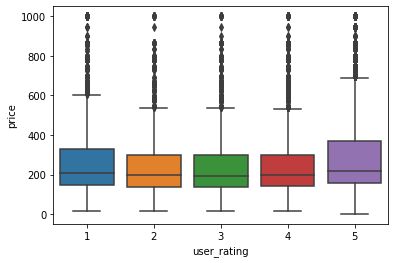

In [ ]:
sns.boxplot(data=df_final,x="user_rating",y="price")

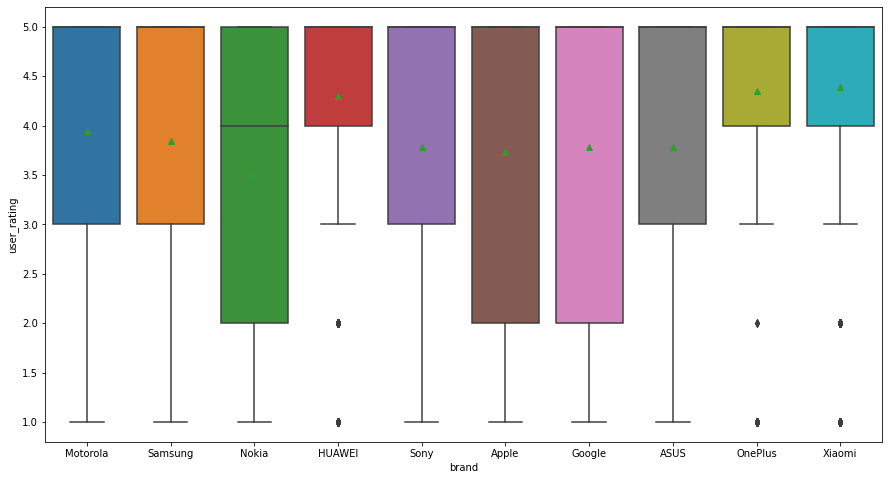

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_final,x="brand",y="user_rating",showmeans=True)

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will peform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [ ]:
# Body is detailed comment and review_title is short comment

In [ ]:
df_final.loc[14,"body"]

"DON'T BUY OUT OF SERVICE"

In [ ]:
# as python is sensitive to case 
df_final["keywords"]=df_final["body"].str.lower()

In [ ]:
df_final["keywords"].head(2)

14                             don't buy out of service
17    1 star because the phones locked so i have to ...
Name: keywords, dtype: object

### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [ ]:
df_final["keywords"]=df_final["keywords"].str.replace("[^\w\s]","")

In [ ]:
df_final["keywords"].head(2)

14                              dont buy out of service
17    1 star because the phones locked so i have to ...
Name: keywords, dtype: object

In [ ]:
import string
df_final["keywords"]=df_final["keywords"].str.translate(str.maketrans("","",string.punctuation))

In [ ]:
df_final["keywords"].head(2)

14                              dont buy out of service
17    1 star because the phones locked so i have to ...
Name: keywords, dtype: object

### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
df_final["keywords"]=df_final["keywords"].astype(str)

In [ ]:
df_final["keywords"]=df_final["keywords"].apply(lambda words: ' '.join(w for w in words.split() if w  not in stop_words))

In [ ]:
df_final["keywords"].head(2)

14                                   dont buy service
17    1 star phones locked pay additional fees unlock
Name: keywords, dtype: object

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [ ]:
#Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. 
#So it links words with similar meaning to one word

In [ ]:
# import these modules
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
def lemmatize_text(text):
  return[lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [ ]:
df_final["lemm"]=df_final["keywords"].apply(lemmatize_text)
df_final["lemm"].head()

14                                 [dont, buy, service]
17    [1, star, phone, locked, pay, additional, fee,...
18    [product, good, used, cell, phone, one, projec...
21    [bought, phone, replace, lg, phone, didnt, lik...
22    [purchased, phone, att, phone, replacement, ev...
Name: lemm, dtype: object

### 5.5 Check most common and rare words in the processed text
- We can also write a function to check word frequency of the text (Optional)

In [ ]:
from collections import Counter
cnt=Counter()
for text in df_final["keywords"].values:
  for word in text.split():
    cnt[word]+=1

cnt.most_common(10)

[('phone', 74458),
 ('great', 16986),
 ('good', 13415),
 ('battery', 11641),
 ('screen', 10377),
 ('like', 10360),
 ('one', 10035),
 ('new', 9498),
 ('use', 8755),
 ('get', 7566)]

### 5.6 Initialize tf-idf vectorizer and transform the preprocessed body text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer()

In [ ]:
tfidf_vectorizer1=TfidfVectorizer(ngram_range=(2,2))

In [ ]:
tfidf=tfidf_vectorizer.fit_transform(df_final["keywords"])

### 5.7 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [ ]:
y=df_final["sentiment"]


### 5.9 Split the data into Train & Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(tfidf,y,random_state=50,stratify=y,test_size=0.30)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1=RandomForestClassifier()
rf_clf1.fit(x_train,y_train)
print(rf_clf1.score(x_train,y_train))
print(rf_clf1.score(x_test,y_test))

0.9958466528221761
0.8885561846689896


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=rf_clf1.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[ 4073,  1413],
       [  634, 12248]])

In [ ]:
# high number of miss classification on test data

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred1=rf_clf1.predict(x_train)
confusion_matrix(y_train,y_pred1)

array([[12640,   160],
       [   18, 30039]])

## 7. Write your conclusion

In [ ]:
# test accuracy 88% for detecting sentiment in reviews of customers and classifying them positive and negative

##. 8. Further Explore
### 8.0 Merge all independent features and the below text preprocessing steps
### 8.1 Check rare words and drop them
### 8.2 Remove emoticon/emojis
### 8.3 Try different vectorizer for vectorization
### 8.4 Use embeddings
### 8.5 Use NN based models